# Read ME



The [training](https://drive.google.com/file/d/1tfo6qm8zB5Eb7TY8WQGey-SqwBiC-3uO/view?usp=sharing) and [test](https://drive.google.com/file/d/1--yMo6lHVrkU9iqXUjLIJpKLYaz7QfLF/view?usp=sharing) data were downloaded from the [Zoo Galaxy](https://data.galaxyzoo.org/#section-21) platform, corresponding to Galaxy Zoo 2 ([images_gz2.zip](https://zenodo.org/records/3565489#.Y3vFKS-l0eY)).  

These data are stored in "[.pkl](https://drive.google.com/drive/folders/1XalRlt11sYmU11op2z3xPnVsRt8Pz0VM?usp=drive_link)" format instead of the original ".jpg" format to facilitate handling. The dataset consists of 10,000 training images and 5,000 test images. The information is reduced to 75 pixels per image, arranged in a 5x5 pixel grid with three color channels. To visualize the galaxy, it is necessary to reconstruct the image.

# Set up

## Packages

In [ ]:
!pip install minisom

In [ ]:
# Mount Google Drive to access and store files
# Comment out this cell if running the script locally

from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to ensure access

Mounted at /content/drive


In [ ]:
# Standard libraries for file handling, data manipulation, and performance tracking
import os                # For file and directory management
import io                # For handling byte streams (e.g., reading and writing in-memory files)
import time              # For measuring execution time and performance tracking
import math              # For mathematical functions like square roots, logarithms, etc.
import h5py              # For reading and writing HDF5 files (used for large datasets)
import random            # For generating random numbers, sampling, and shuffling
import requests          # For making HTTP requests, like downloading files from the internet
import numpy as np       # For numerical computations and array manipulation
import pandas as pd      # For data manipulation, especially with DataFrames
import matplotlib.pyplot as plt  # For creating and displaying plots and visualizations

# Machine learning tools for feature reduction and data scaling
from sklearn.decomposition import IncrementalPCA  # For performing incremental PCA on large datasets
from sklearn.preprocessing import StandardScaler  # For standardizing data (scaling to zero mean, unit variance)
import joblib                                      # For saving and loading trained machine learning models


In [ ]:
# Import MiniSom for Self-Organizing Maps (SOM), an unsupervised learning technique

from minisom import MiniSom

## Funtions

In [ ]:
def load_logdata(data='train'):
    """
    Downloads and loads preprocessed training or testing log data from Google Drive.

    Parameters:
    - data (str): Specifies which log data to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded log data if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test log data
    if data.lower() == 'train':
        file_id = '1wDuS7VDzPIFEb7w_L6q1oe85ONsfEntC'  # File ID for log data train

    elif data.lower() == 'test':
        file_id = '1wAKlz1x5GZ0HbJYL90KcgVJKuDW2ZfIv'  # File ID for log data test

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = pd.read_csv(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_data(data='train'):
    """
    Downloads and loads preprocessed training or testing data from Google Drive.

    Parameters:
    - data (str): Specifies which dataset to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded dataset if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test datasets
    if data.lower() == 'train':
        file_id = '1-8JHObeY7kaU0qLt0p7WDFRJf6A6iYFN'  # File ID for training data

    elif data.lower() == 'test':
        file_id = '1bdjlyKp02O04uGkixX1E4mQMkUjvWRbL'  # File ID for test data

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = joblib.load(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_model(model='ipca'):
    """
    Downloads and loads a machine learning model from Google Drive.

    Parameters:
    - model (str): Specifies which model to load ('ipca' or 'scaler').

    Returns:
    - DATA (object or None): The loaded model object if successful, otherwise None.
    """

    # Define Google Drive file IDs for different models
    if model.lower() == 'ipca':
        file_id = '1s_reCv_xE5jQ_pKUtoPDsH6qPRJId_OL'  # File ID for the Incremental PCA model

    elif model.lower() == 'scaler':
        file_id = '1kl2dynGnyYr70_ChOOzQT3z1t3n7RB9w'  # File ID for the StandardScaler model

    else:
        print('Error: Invalid model type specified')  # Handle incorrect input
        return None

    # Construct the Google Drive download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Send a request to download the model file
    respuesta = requests.get(url)

    # Convert the downloaded content into a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the model using joblib
    MODEL = joblib.load(file_stream)

    # Confirm successful model loading
    print(f'Model loaded: {MODEL}')

    return MODEL

def single_reconverter(data):
    """
    Takes a single PCA-transformed data point, reverses the PCA and scaling transformations,
    and normalizes it before reshaping it into an image.

    Parameters:
    - data (numpy array): A single data point in PCA-reduced form.

    Returns:
    - norm_centroides (numpy array): Reconstructed image (174x174x3).
    """
    data = data.reshape(1, -1)  # Ensure data is a 2D array
    centroides = scaler.inverse_transform(data)  # Reverse standard scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA transformation
    norm_centroides = normalized(centroides)  # Normalize pixel values
    norm_centroides = norm_centroides.reshape(174, 174, 3)  # Reshape into an image
    return norm_centroides


def reconverter(data):
    """
    Reconstructs multiple PCA-reduced data points back into images.

    Parameters:
    - data (numpy array): Multiple PCA-transformed data points.

    Returns:
    - norm_centroides (numpy array): Reconstructed images with normalized pixel values.
    """
    centroides = scaler.inverse_transform(data)  # Reverse scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA
    norm_centroides = normalized(centroides)  # Normalize pixel values
    return norm_centroides


def normalized(data):
    """
    Normalizes data to the range [0,1] using min-max scaling.

    Parameters:
    - data (numpy array): Input data.

    Returns:
    - norm (numpy array): Normalized data.
    """
    norm = (data - data.min()) / (data.max() - data.min())  # Min-max normalization
    return norm

def clusters_histograms(log_data, type_data):
    """
    Generates histograms showing the frequency of each galaxy class for each cluster.

    Parameters:
    - log_data (DataFrame): The dataset containing 'prediction' (cluster assignments) and 'gz2_class' (class labels).
    - type_data (str): Describes the dataset type ('Train' or 'Test') to be displayed in the plot title.

    Returns:
    - None
    """

    # Get unique cluster labels and class labels in the dataset
    clusters = log_data['prediction'].unique()
    order = sorted(log_data['gz2_class'].unique())  # Sort class labels alphabetically

    poss = 1  # Initialize subplot position counter
    plt.figure(figsize=(15, 15))  # Create a figure with a large size for multiple histograms

    # Set the overall title of the figure
    plt.suptitle(f'Histograms for each cluster ({type_data})')

    # Loop through each cluster to plot its class distribution
    for c in sorted(clusters):
        # Get the frequency of each class within the current cluster
        hismo = log_data[log_data['prediction'] == c]['gz2_class'].value_counts()

        # Reindex the histogram to ensure all class labels are present, filling missing with 0
        hismo = hismo.reindex(order, fill_value=0)

        # Create a subplot for each cluster's histogram
        plt.subplot(4, 3, poss)  # Arrange in a 4x3 grid for better visualization
        # Plot the histogram as a bar chart
        plt.bar(hismo.index, hismo)

        # Label the axes and set the title for this cluster
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.title(f'Class Frequency for Cluster {c}')

        # Add grid lines along the y-axis for better readability
        plt.grid(axis='y')

        poss += 1  # Increment the subplot position counter

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Save the histogram figure as a PDF
    plt.savefig(f'{root_result}Histograms_for_each_cluster_{type_data}.pdf')

    # Display the figure
    plt.show()

    return None

def histogram(labels, clusters, name):
    """
    Plots a histogram of cluster distribution with a semi-logarithmic scale.

    Parameters:
    - labels (array-like): Cluster assignments for each sample.
    - bins (int or sequence): Number of bins or bin edges for the histogram.
    - name (str): File name for saving the plot.

    Returns:
    - None
    """

    # Define bin edges for the histogram, covering all cluster indices
    bins = np.arange(0,n_clusters+1)

    # Set up the figure size for better visualization
    plt.figure(figsize=(15, 4))

    # Set the title of the plot
    plt.title('Distribution for Each Cluster')

    # Use a semi-logarithmic scale to highlight differences in frequency
    plt.semilogy()

    # Plot a histogram showing the frequency of samples in each cluster
    frecuencia, clases, _ = plt.hist(labels, bins=bins, rwidth=0.8)

    # Label the axes
    plt.xlabel('Cluster')
    plt.ylabel('Frequency')

    # Set cluster numbers as x-axis ticks (centered between bins)
    plt.xticks(bins[:-1] + 0.5, bins[:-1])

    # Add a grid along the y-axis for better readability
    plt.grid(axis='y')

    # Adjust layout to prevent overlapping elements
    plt.tight_layout()

    # Save the figure as a PDF file in the results directory
    plt.savefig(f'{root_result}{name}.pdf')

    # Display the plot
    plt.show()

    return None

## Directories

In [ ]:
### Drive roots ####

root_train ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/train_data.pkl'
root_test ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/test_data.pkl'

root_ipca = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
root_scaler = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

root_log_data = '/content/drive/MyDrive/Practicas_Profesionales/Data/Log_data/'

root_som = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/SOM.pkl'
root_result = '/content/drive/MyDrive/Practicas_Profesionales/Results/SOM/'

In [ ]:
# ### Local roots ####

# root_train ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/train_data.pkl'
# root_test ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/test_data.pkl'

# root_ipca = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
# root_scaler = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

# root_som = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/SOM.pkl'
# root_result = '/home/tonathiu/Fisica/Practicas_Profesionales/Results/SOM/'

## Load Models

In [ ]:
# Load models from drive

ipca = load_model('ipca')
scaler = load_model('scaler')

Model loaded: IncrementalPCA(batch_size=100, n_components=75)
Model loaded: StandardScaler()


In [ ]:
# ## Run if you have file of ipca & scaler on your computer/Drive

# ipca = joblib.load(root_ipca)
# scaler = joblib.load(root_scaler)

## Load Log Data

In [ ]:
# Load the training and testing log data from Google Drive

log_data_train = load_logdata('train')  # Load the log data for the training set
log_data_test = load_logdata('test')    # Load the log data for the testing set

train data loaded
Shape: (10000, 3)
test data loaded
Shape: (10000, 3)


# [Self-Organizing Map](https://sklearn-som.readthedocs.io/en/latest/)

## Load Train Data

In [ ]:
# Load dataset from drive

train_data = load_data('train')

train data loaded
Shape: (10000, 75)


In [ ]:
# ## Run if you have datasets on your computer/Drive

# train_data = joblib.load(root_train)
# Test_data = joblib.load(root_test)

## Train

In [ ]:
n_clusters = len(log_data_train['gz2_class'].unique())


# Define the shape of the Self-Organizing Map (SOM) grid
som_shape = (math.ceil(n_clusters/3), 3)  # Grid size: 4 rows x 3 columns

# Initialize the MiniSom model
Model_som = MiniSom(
    som_shape[0], som_shape[1],         # Grid dimensions (5x4)
    train_data.shape[1],                # Number of input features (should match train_data's feature size)
    sigma=1,                            # Defines neighborhood size for weight updates (controls smoothness)
    learning_rate=0.05,                 # Learning rate for weight adjustments
    neighborhood_function='triangle',   # Neighborhood function to adjust weights
    random_seed=13,                     # Ensures reproducibility of results
    activation_distance='cosine'        # Uses cosine distance for neuron activation
)

# Train the SOM using batch training with 10,000 iterations
Model_som.train_batch(train_data, 10_000, verbose=True)  # Verbose=True for progress updates


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 7.459886400940853


## Clasification

In [ ]:
# Compute the Best Matching Unit (BMU) for each data point in the SOM
winner_coordinates = np.array([Model_som.winner(x) for x in train_data]).T

# Convert the BMU coordinates into a single-dimensional label for each data point
labels = np.ravel_multi_index(winner_coordinates, som_shape)

# Identify the unique cluster labels in the SOM grid
label = np.unique(labels)

log_data_train['prediction'] = labels
log_data_train.head()

,dr7objid,asset_id,gz2_class,prediction
0,587733079744512108,253043,Ec,9
1,588295842860105844,238739,Ec,9
2,587730847961645743,274697,Ser,5
3,587732053237366856,50470,Er,9
4,587739096983076959,117625,Sb,3


## Histograma

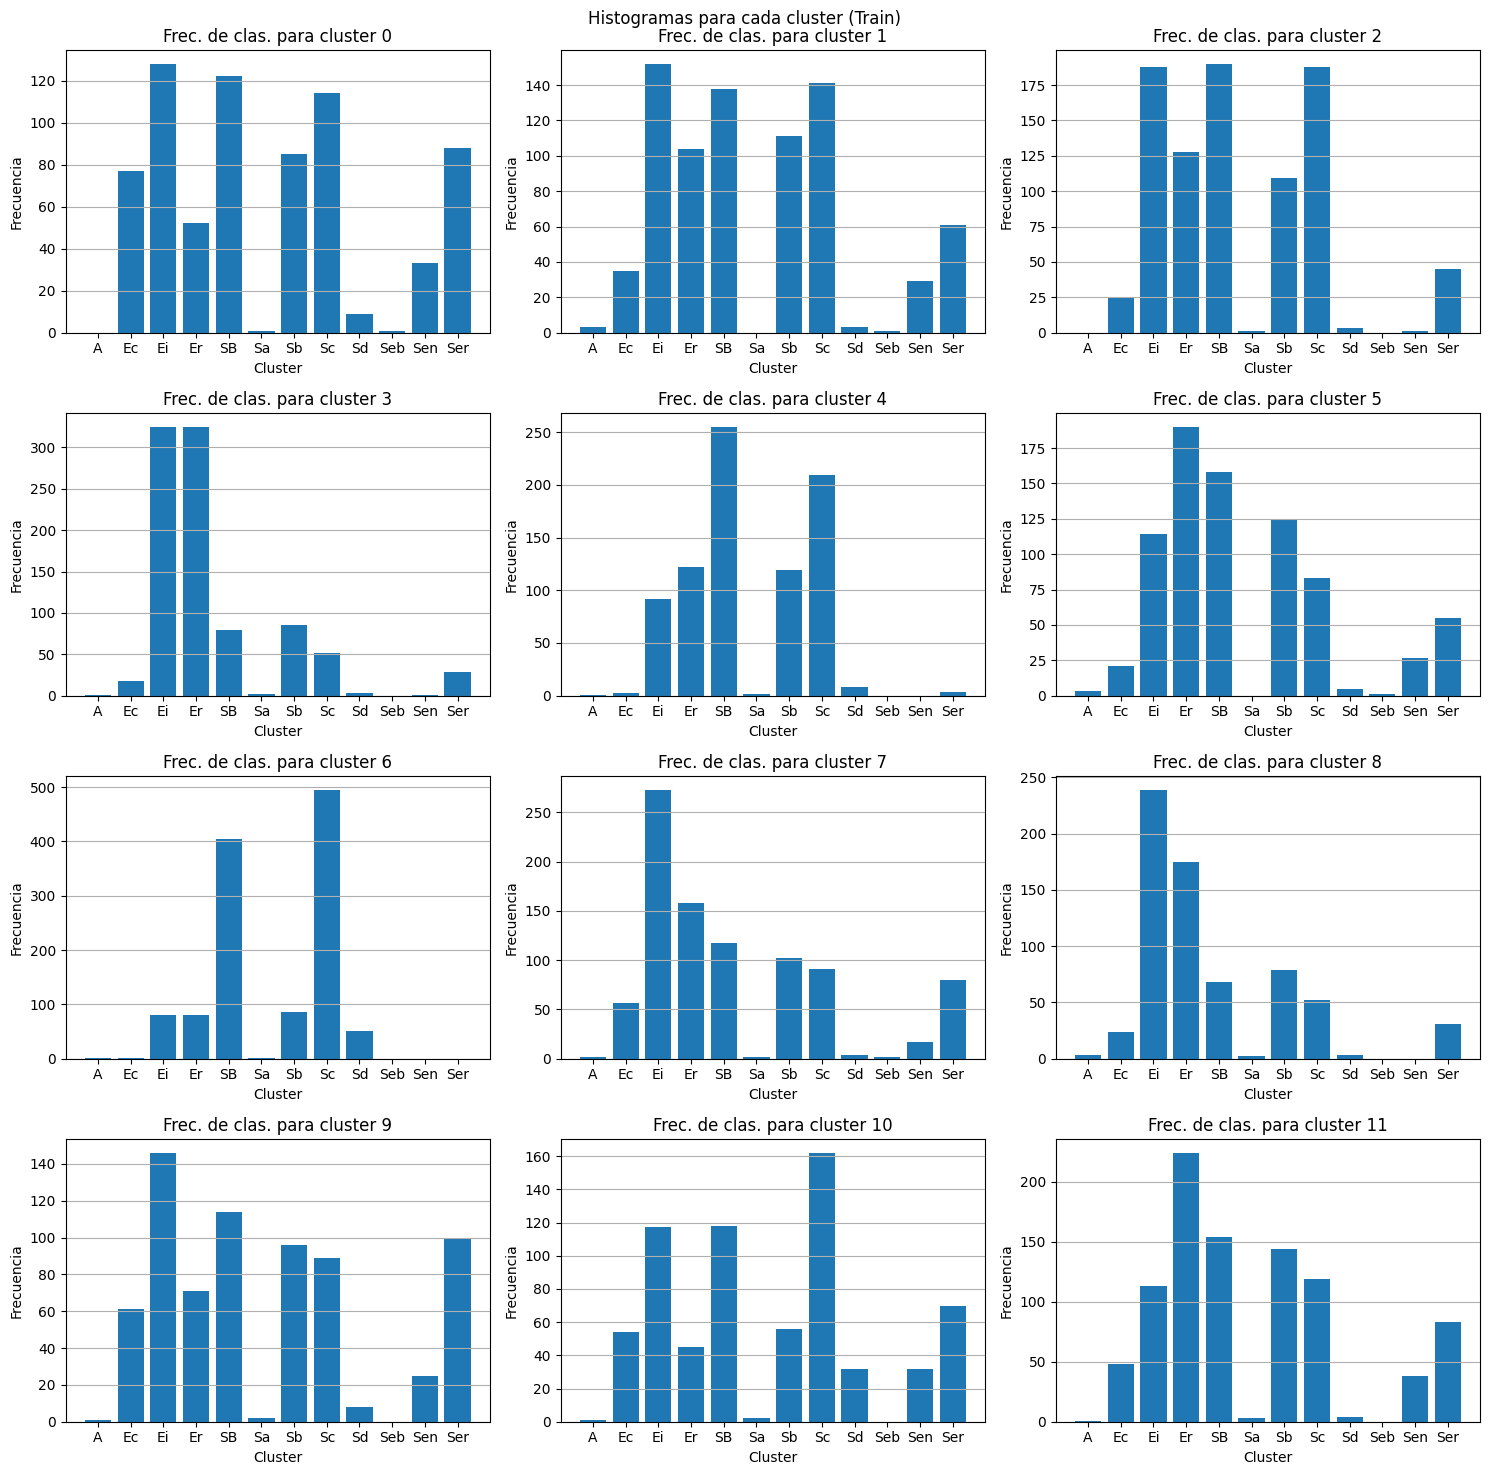

In [ ]:
# Generate histograms for each cluster showing the distribution of galaxy classes in the training dataset
clusters_histograms(log_data_train,'Train')

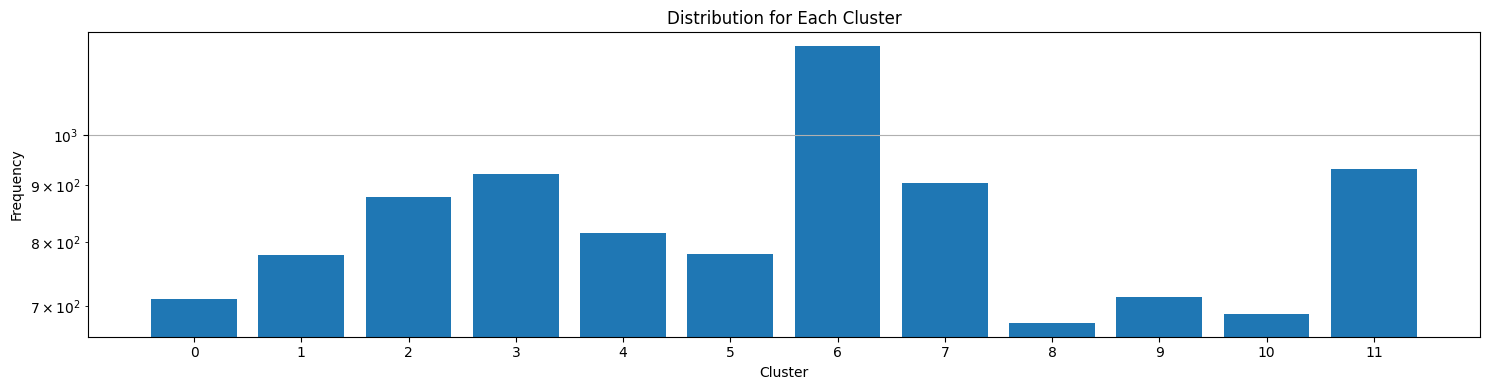

In [ ]:
# Plot and save a histogram showing the distribution of cluster labels in the training data
histogram(labels, n_clusters, 'Histograma_Train_SOM')

## Centroides

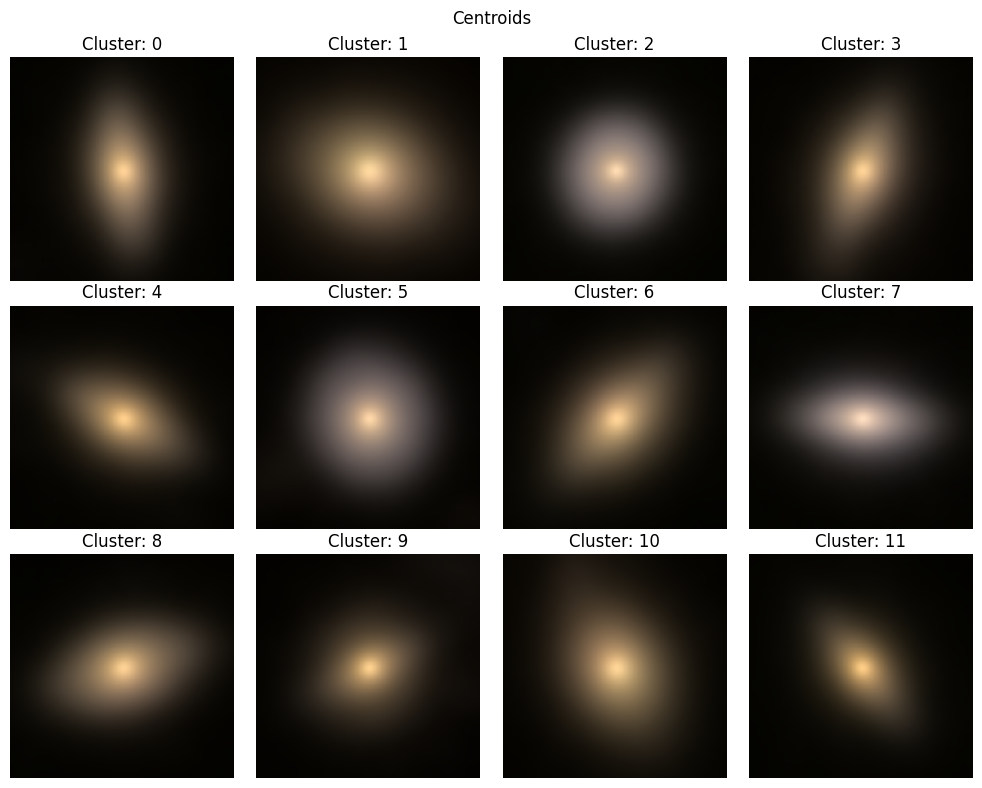

In [ ]:
# Retrieve the weight vectors (centroids) of the trained SOM
centroides = Model_som.get_weights()

# Create a figure to visualize the centroids
plt.figure(figsize=(10, 8))

# Iterate over the SOM grid to extract and plot each centroid
for i in range(som_shape[0]):  # Loop over rows
    for j in range(som_shape[1]):  # Loop over columns
        # Convert the centroid vector back into an image representation
        center = single_reconverter(centroides[i][j])

        # Define the position in the subplot grid
        plt.subplot(som_shape[1], som_shape[0], (i + j * som_shape[0]) + 1)

        # Set the title for each centroid
        plt.title(f'Cluster: {i + j * som_shape[0]}')

        # Display the centroid image
        plt.imshow(center)
        plt.axis('off')  # Hide axes for better visualization

# Set a global title for the figure
plt.suptitle('Centroids')

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.savefig(f'{root_result}Centroides_SOM.pdf')
# Display the visualization
plt.show()


In [ ]:
# Initialize subplot index
ploteo = 1

# Create a figure with dynamic height based on the number of clusters
plt.figure(figsize=(10, 3 * n_clusters))

# Iterate over each unique cluster label
for etq in label:
    cuenta = 1  # Counter to limit the number of images per cluster

    # Loop through all samples in the training dataset
    for i in range(len(train_data)):
        rand = random.random()  # Generate a random number for sampling

        # Select images that belong to the current cluster with a probability filter (rand > 0.5)
        if etq == labels[i] and rand > 0.5:
            # Convert the PCA-transformed sample back into an image
            img = single_reconverter(train_data[i])

            # Plot the image in a grid (num_cluster x 5 layout)
            plt.subplot(n_clusters, 5, ploteo)
            plt.imshow(img)
            plt.axis('off')  # Hide axis for cleaner visualization

            # Set a title for the third image in each cluster
            if cuenta == 3:
                plt.title(f'Cluster {etq}')

            ploteo += 1  # Increment subplot index
            cuenta += 1  # Increment the image counter for this cluster

        # Stop after plotting 5 images per cluster
        if cuenta > 5:
            break

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.5)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure as a PDF file in the results directory
plt.savefig(f'{root_result}Clusters_Train_SOM.pdf')

# Display the figure
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Save

In [ ]:
# Save the trained Self-Organizing Map (SOM) model on Drive
joblib.dump(Model_som, root_som)

['/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/SOM.pkl']

# Test Model

## Load Model

In [ ]:
# Load the previously saved Self-Organizing Map (SOM) model from the specified directory
SOMa_model = joblib.load(root_som)

# Get the shape of the SOM grid (height and width) from the model's weights
som_shape = SOMa_model._weights.shape[:2]

## Load Data

In [ ]:
# Load dataset from drive

Test_data = joblib.load(root_test)

## Classification


In [ ]:
# Compute the Best Matching Unit (BMU) for each data point in the SOM
winner_coordinates = np.array([SOMa_model.winner(x) for x in Test_data]).T

# Convert the BMU coordinates into a single-dimensional label for each data point
labels = np.ravel_multi_index(winner_coordinates, som_shape)

# Identify the unique cluster labels in the SOM grid
label = np.unique(labels)

log_data_test['prediction'] = labels
log_data_test.head()

,dr7objid,asset_id,gz2_class,prediction
0,587741727649300599,159627,Er,7
1,587742629600624749,180167,SB,6
2,588011103182127299,199851,Sc,6
3,587744727151345789,185584,Sc,4
4,587732769986707556,61265,Sc,1


## Histograma

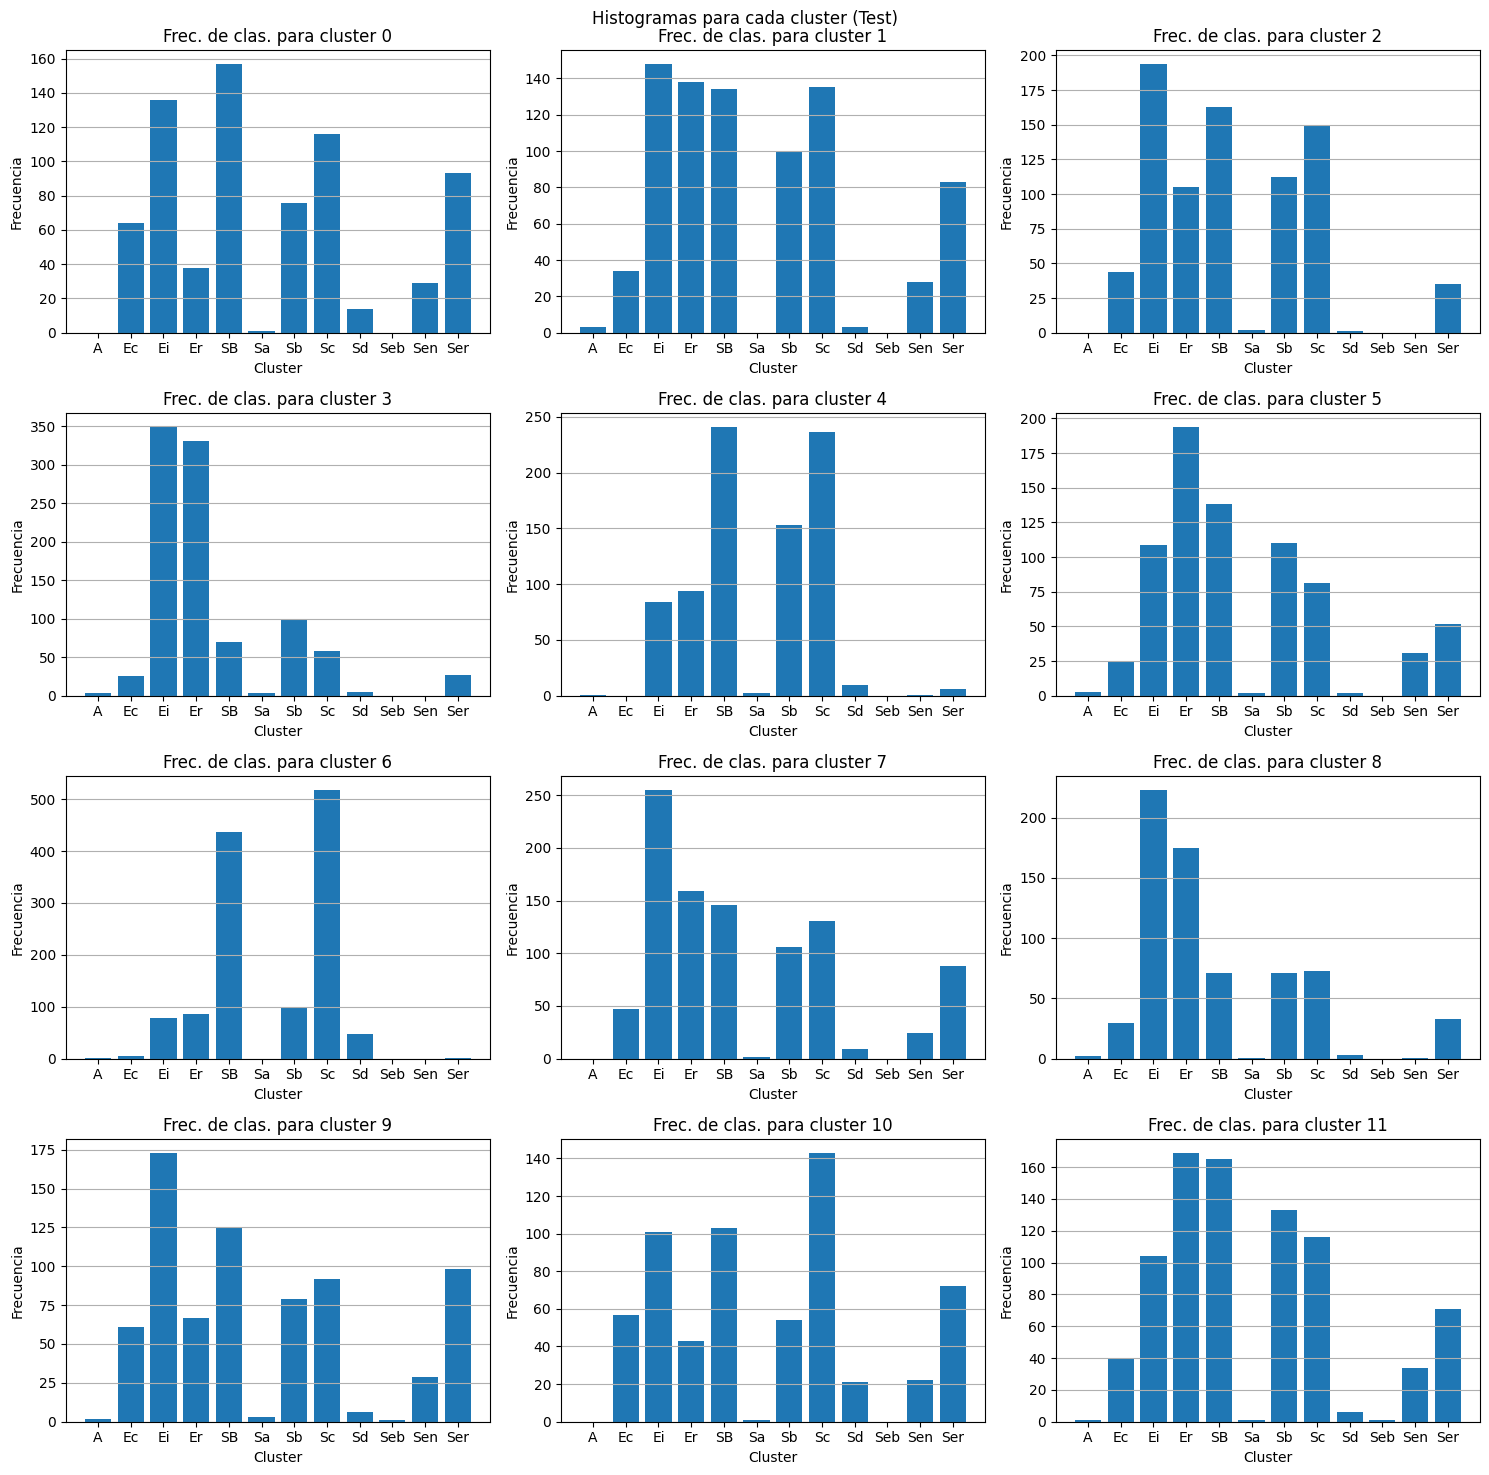

In [ ]:
n_clusters = len(log_data_test['gz2_class'].unique())

# Generate histograms for each cluster showing the distribution of galaxy classes in the testing dataset
clusters_histograms(log_data_test,'Test')

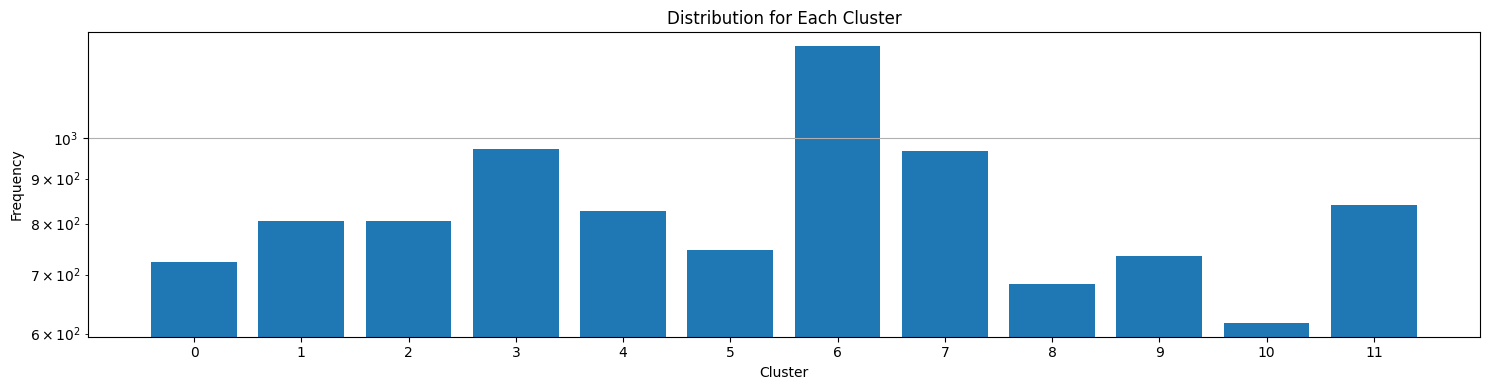

In [ ]:
# Plot and save a histogram showing the distribution of cluster labels in the testing data
histogram(labels, n_clusters, 'Histograma_Test_SOM')

## Centroides

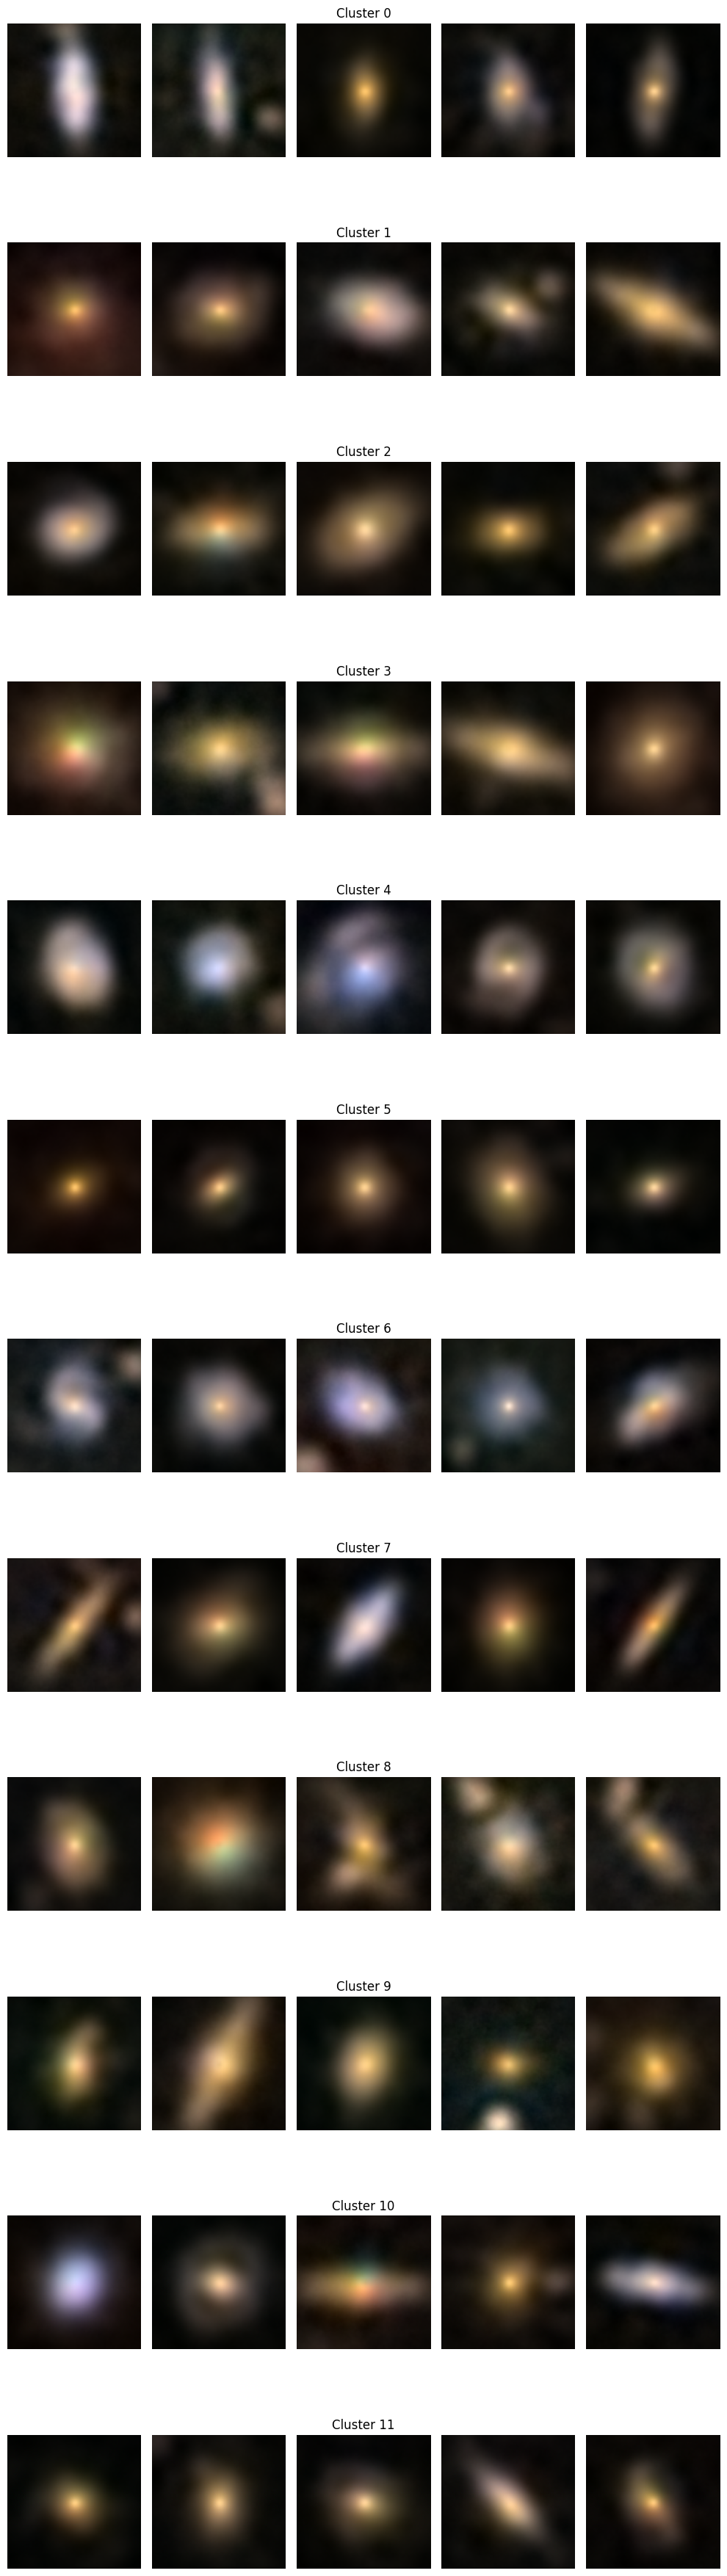

In [ ]:
# Initialize subplot index
ploteo = 1

# Create a figure with dynamic height based on the number of clusters
plt.figure(figsize=(10, 3 * n_clusters))

# Iterate over each unique cluster label
for etq in label:
    cuenta = 1  # Counter to limit the number of images per cluster

    # Loop through all samples in the test dataset
    for i in range(len(Test_data)):
        rand = random.random()  # Generate a random number for sampling

        # Select images that belong to the current cluster with a probability filter (rand > 0.5)
        if etq == labels[i] and rand > 0.5:
            # Convert the PCA-transformed sample back into an image
            img = single_reconverter(Test_data[i])

            # Plot the image in a grid (num_cluster x 5 layout)
            plt.subplot(n_clusters, 5, ploteo)
            plt.imshow(img)
            plt.axis('off')  # Hide axis for cleaner visualization

            # Set a title for the third image in each cluster
            if cuenta == 3:
                plt.title(f'Cluster {etq}')

            ploteo += 1  # Increment subplot index
            cuenta += 1  # Increment the image counter for this cluster

        # Stop after plotting 5 images per cluster
        if cuenta > 5:
            break

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.01, hspace=0.5)
# Adjust layout to prevent overlapping
plt.tight_layout()
# Save the figure as a PDF file in the results directory
plt.savefig(f'{root_result}Clusters_Test_SOM.pdf')
# Display the figure
plt.show()
